In [1]:
from __future__ import division, unicode_literals, print_function  # for compatibility with Python 2 and 3

import matplotlib as mpl
import matplotlib.pyplot as plt

# change the following to %matplotlib notebook for interactive plotting
%matplotlib inline

# Optionally, tweak styles.
mpl.rc('figure',  figsize=(10,10))
mpl.rc('image', cmap='gray')

In [2]:
pip install pims

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install trackpy

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience

import pims
import trackpy as tp
import cv2
import math
import scipy
from numpy import array, exp
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt 

In [6]:
@pims.pipeline
def gray(image):
    return image[:, :, 1]  # Take just the green channel

frames = gray(pims.Video(r'/Users/rohan/Desktop/college/surge/Water-SP5-HP1-05242023144720.avi'))
# janus particle

In [7]:
len(frames)

3019

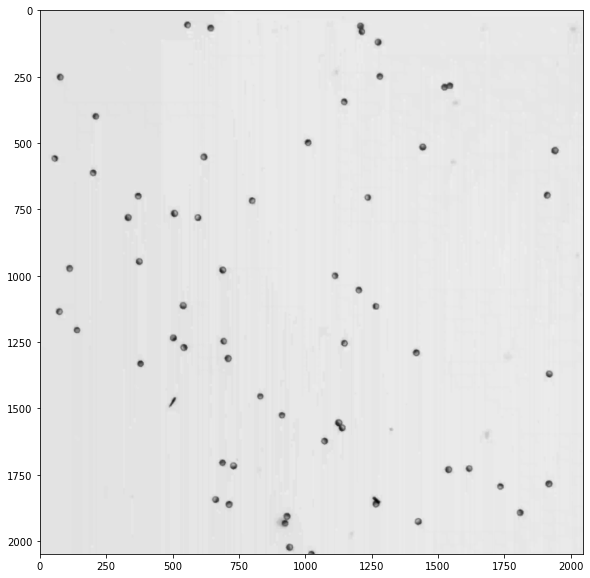

In [8]:
plt.imshow(frames[0])

In [9]:
binary_frames = np.zeros((len(frames),471,500))

In [10]:
for i in range(len(frames)):
    ret, binary_frame = cv2.threshold(frames[i], 150, 255, cv2.THRESH_BINARY)
    resized_binary_frame = cv2.resize(binary_frame, (500,471))
    binary_frames[i] = resized_binary_frame
# converting into binary image and putting threshold value of 165 so that the ball can be filled completely

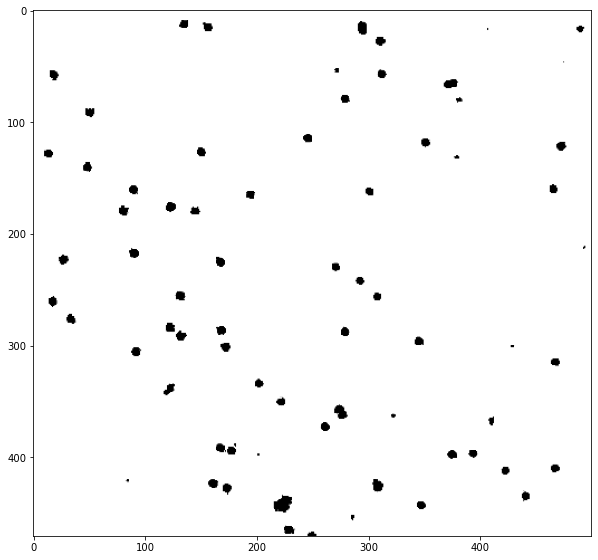

In [11]:
plt.imshow(binary_frames[0])

In [12]:
f = tp.batch(binary_frames[::],23, invert=True, minmass=100 ); 
# gaussian-blob diameter 23, background dimmer than object, minmass- threshold for finding blob 

Frame 3018: 49 features


In [13]:
f.head(50)

,y,x,mass,size,ecc,signal,raw_mass,ep,frame
0,14.748872,156.120576,10699.933590,3.059453,0.103989,229.257772,-82309.0,0.0,0
1,27.292800,310.773582,11060.063208,3.048107,0.065436,227.401434,-81598.0,0.0,0
2,53.510217,271.794754,3043.466537,1.958708,0.030890,209.766221,-92319.0,0.0,0
3,56.825123,312.035862,9627.898259,2.830880,0.037708,232.042279,-83893.0,0.0,0
4,57.684807,18.171138,10966.318127,3.091440,0.112811,228.329603,-81949.0,0.0,0
5,65.533159,373.837732,14877.622789,3.815837,0.300665,216.263404,-75549.0,0.0,0
6,79.023488,279.215928,9405.137671,2.806606,0.047989,232.042279,-84217.0,0.0,0
7,91.144027,50.494500,10884.639244,3.083154,0.077339,228.329603,-82080.0,0.0,0
8,114.243049,245.788113,9948.116605,2.897483,0.076025,231.114110,-83446.0,0.0,0
9,118.124469,351.332101,10044.646193,2.902388,0.063524,231.114110,-83316.0,0.0,0


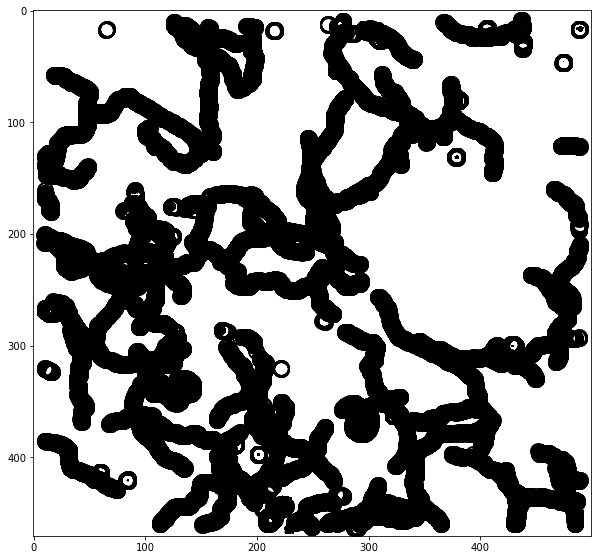

In [14]:
tp.annotate(f,binary_frames[0],color='black'); #f -> trajectory data points , binary_frames[0] -> reference image

In [15]:
t = tp.link(f, 30, memory=3000)
# f-> all trajectory, search_range-> 30 (the maximum distance features can move between frames)
# memory -> the maximum number of frames during which a feature can vanish, 
#then reappear nearby, and be considered the same particle. 

Frame 3018: 49 trajectories present.


In [16]:
t.head(50)

,y,x,mass,size,ecc,signal,raw_mass,ep,frame,particle
0,14.748872,156.120576,10699.933590,3.059453,0.103989,229.257772,-82309.0,0.0,0,0
28,286.248091,168.251602,10576.487097,2.997293,0.074834,228.329603,-81934.0,0.0,0,1
29,287.663541,279.053357,9897.995472,2.879048,0.029818,231.114110,-83545.0,0.0,0,2
30,296.111562,345.437043,10283.185656,2.990236,0.089488,230.185941,-82968.0,0.0,0,3
31,300.491738,429.021811,1404.319875,1.668494,0.154601,141.081706,-94209.0,0.0,0,4
32,305.472672,91.907211,10953.323759,3.044177,0.004285,228.329603,-82003.0,0.0,0,5
33,314.708068,467.550742,9191.658774,2.847818,0.128579,232.042279,-84516.0,0.0,0,6
34,333.843073,202.032387,9084.919325,2.767060,0.040572,232.970449,-84643.0,0.0,0,7
35,339.144123,121.648554,11939.967531,3.586257,0.319617,223.688757,-80200.0,0.0,0,8
36,350.285993,221.855926,9045.008053,2.799161,0.112547,232.970449,-84672.0,0.0,0,9


In [17]:
t.particle.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84],
      dtype=int64)

In [18]:
print('no of diff particles observed=',len(t.particle.unique()))

no of diff particles observed= 85


In [19]:
t1 = tp.filter_stubs(t, 1)
# Compare the number of particles in the unfiltered and filtered data.
print('Before:', t['particle'].nunique())
print('After:', t1['particle'].nunique())

Before: 85
After: 85


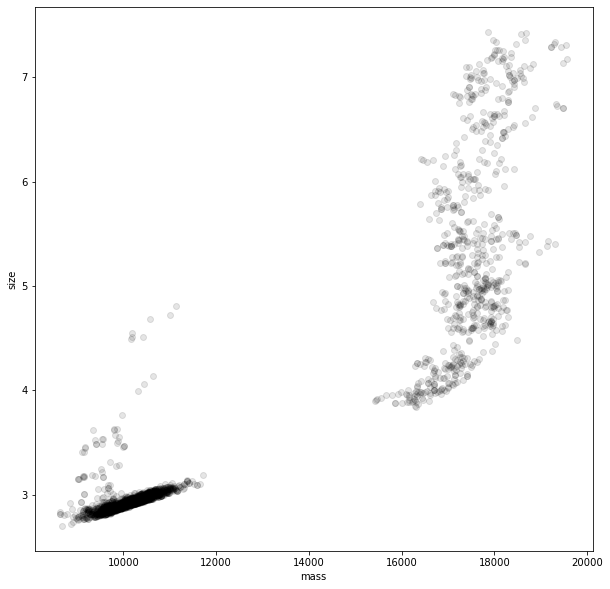

In [20]:
tp.mass_size(t1[t1['particle']==0]); # convenience function -- just plots size vs. mass - particle 1

In [21]:
t2 = t1[((t1['mass'] > 7000) & (t1['size'] > 1) &
         (t1['ecc'] > 0))]
# #  constraints to remove false detections

In [22]:
t2.head(20)

,y,x,mass,size,ecc,signal,raw_mass,ep,frame,particle
frame,,,,,,,,,,
0,14.748872,156.120576,10699.933590,3.059453,0.103989,229.257772,-82309.0,0.0,0,0
0,286.248091,168.251602,10576.487097,2.997293,0.074834,228.329603,-81934.0,0.0,0,1
0,287.663541,279.053357,9897.995472,2.879048,0.029818,231.114110,-83545.0,0.0,0,2
0,296.111562,345.437043,10283.185656,2.990236,0.089488,230.185941,-82968.0,0.0,0,3
0,305.472672,91.907211,10953.323759,3.044177,0.004285,228.329603,-82003.0,0.0,0,5
0,314.708068,467.550742,9191.658774,2.847818,0.128579,232.042279,-84516.0,0.0,0,6
0,333.843073,202.032387,9084.919325,2.767060,0.040572,232.970449,-84643.0,0.0,0,7
0,339.144123,121.648554,11939.967531,3.586257,0.319617,223.688757,-80200.0,0.0,0,8
0,350.285993,221.855926,9045.008053,2.799161,0.112547,232.970449,-84672.0,0.0,0,9


In [23]:
################### ASK ABOUT ThE %1
t3 = t2 [ t2['frame']%1 == 0]
# 1 means that no frame is skipping , 2 means that alternate frames will be stored in t3 so the noise in graph will reduce

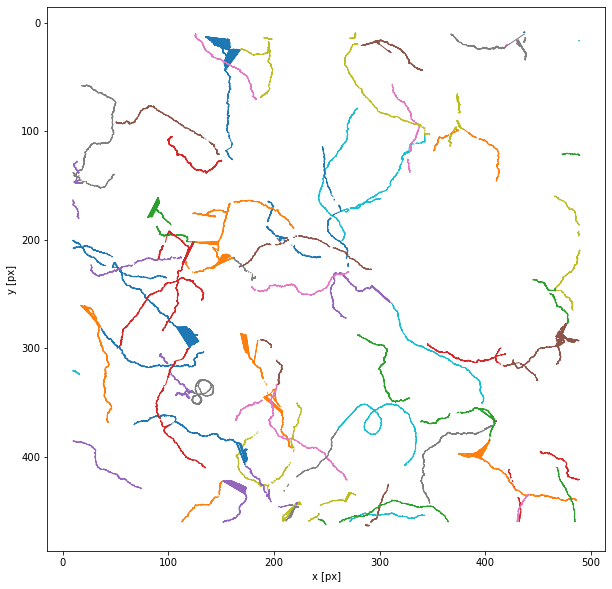

In [24]:
plt.figure()
tp.plot_traj(t3);

In [25]:
from trackpy import motion

# Compute MSD for each particle
msd_data = []
for particle_id in t2['particle'].unique():
    particle_traj = t2.loc[t2['particle'] == particle_id]
    msd_particle = motion.msd(particle_traj, mpp=0.44, fps=20, max_lagtime = len(t2))
    msd_data.append(msd_particle)

# mpp === micron per pixel(depend upon the video)
# fpp === frames per second(depend upon the video)

In [26]:
msd_data

[           <x>        <y>     <x^2>        <y^2>          msd    lagt
 lagt                                                                 
 1     0.000362   0.016043  2.040969     0.625133     2.666102    0.05
 2     0.000588   0.032038  2.910033     0.917057     3.827090    0.10
 3     0.000763   0.048081  3.295940     1.017550     4.313490    0.15
 4     0.000676   0.064396  3.890595     1.180479     5.071074    0.20
 5     0.001112   0.080108  3.830363     1.223655     5.054018    0.25
 ...        ...        ...       ...          ...          ...     ...
 3014  2.021449  48.940575  4.092935  2395.194804  2399.287739  150.70
 3015  2.051295  48.990836  4.210509  2400.103118  2404.313627  150.75
 3016  2.078947  49.001643  4.322380  2401.161170  2405.483550  150.80
 3017  2.053583  49.011289  4.217202  2402.106442  2406.323644  150.85
 3018  2.049922  49.004818  4.202180  2401.472159  2405.674339  150.90
 
 [3018 rows x 6 columns],
             <x>        <y>       <x^2>        <y

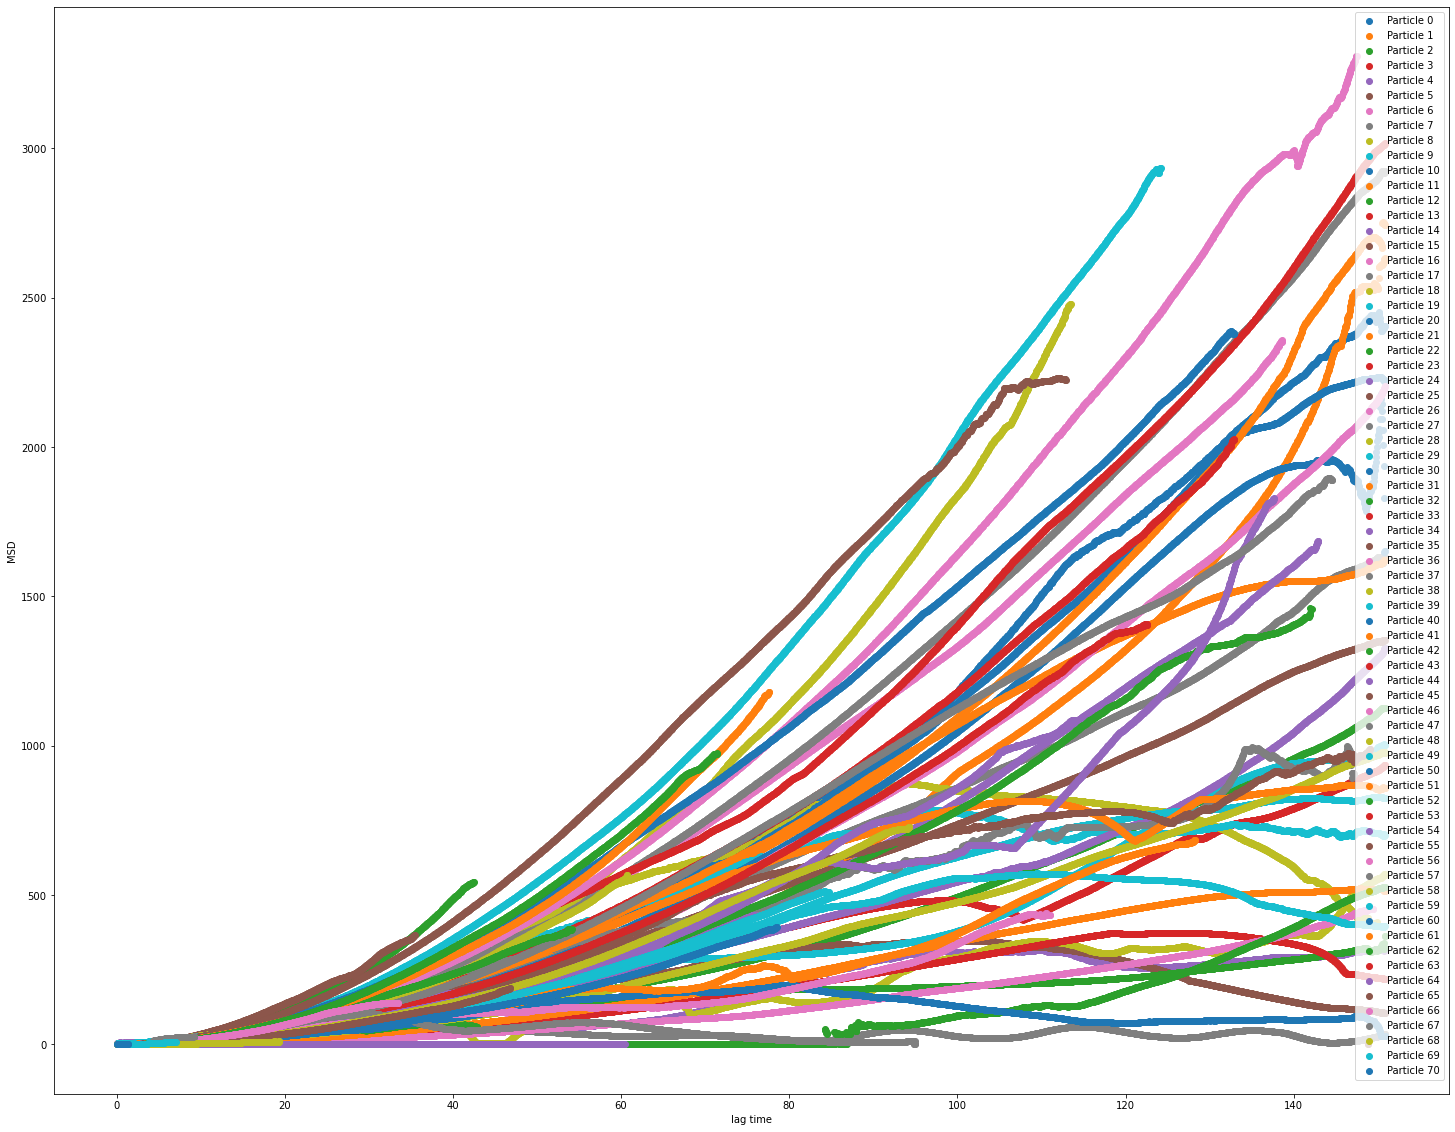

In [27]:
# Plot MSD curves for all particles

fig, ax = plt.subplots(figsize=(25,20))
for i in range(len(msd_data)):
    msd_particle = msd_data[i]
    ax.scatter(msd_particle.lagt, msd_particle.msd, label='Particle {}'.format(i))
    
# Optionally, add labels and legend
ax.set_xlabel('lag time')
ax.set_ylabel('MSD')
ax.legend()
plt.show()

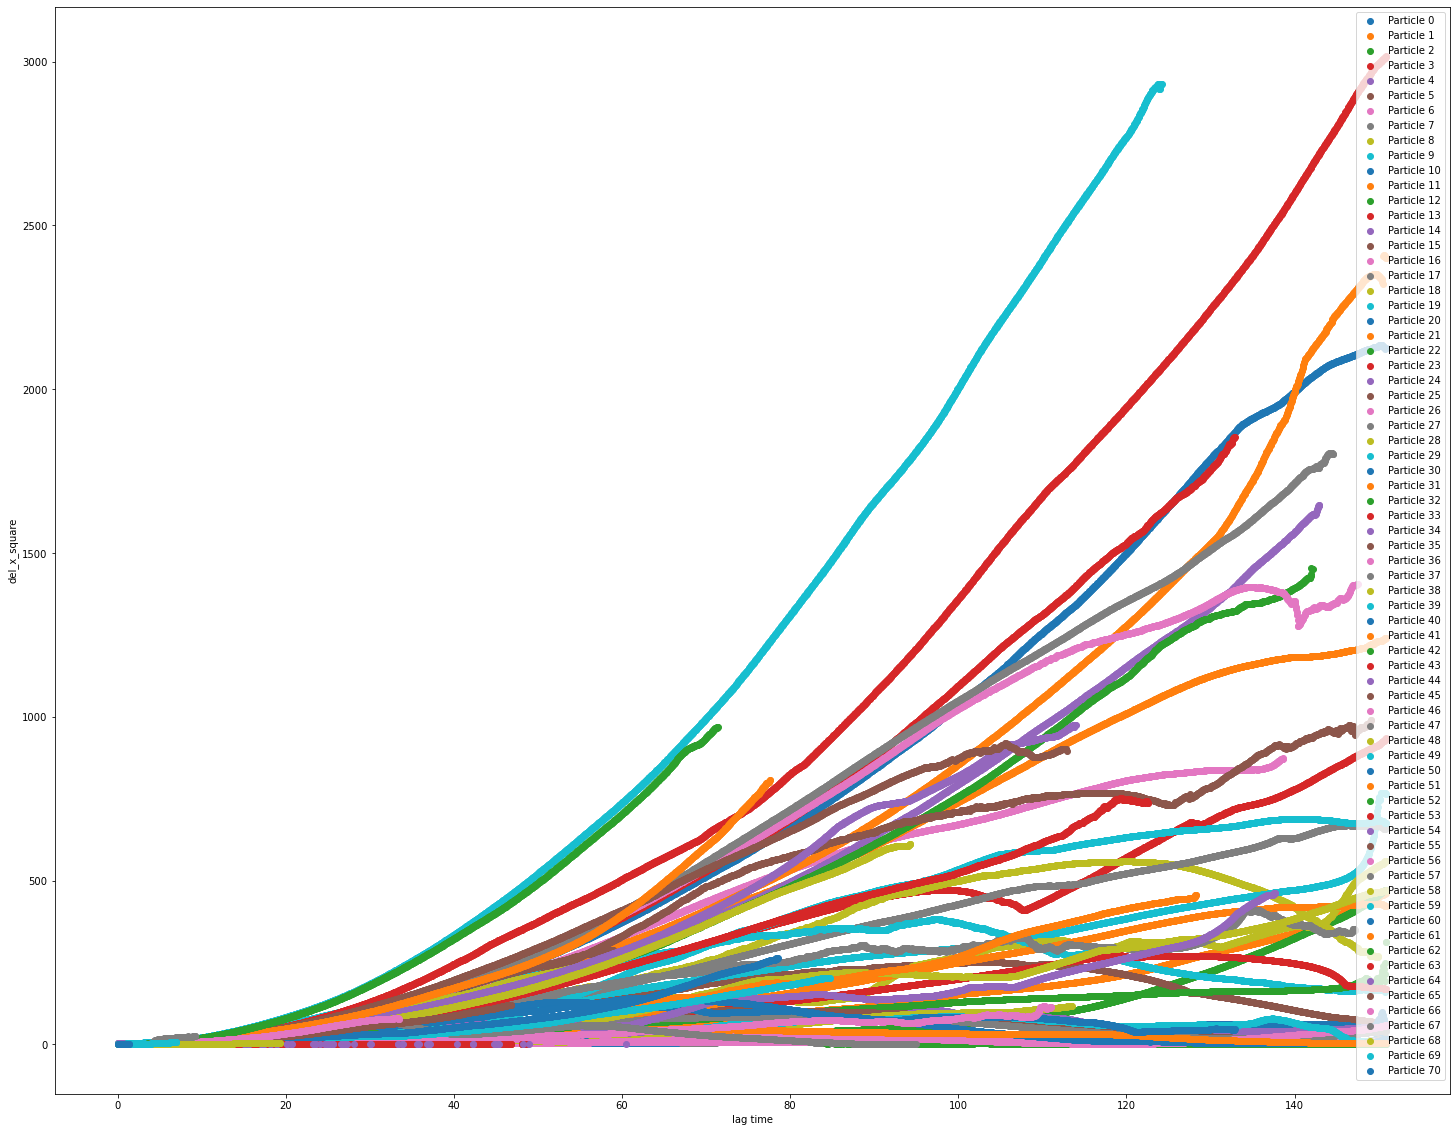

In [28]:
# Plot MSD curves for all particles
fig, ax = plt.subplots(figsize=(25,20))
for i in range(len(msd_data)):
    msd_particle = msd_data[i]
    ax.scatter(msd_particle.lagt, msd_particle['<x^2>'], label='Particle {}'.format(i))
    
# Optionally, add labels and legend
ax.set_xlabel('lag time')
ax.set_ylabel('del_x_square')
ax.legend()
plt.show()

In [29]:
xm = t2.x*0.22*2
ym = t2.y*0.22*2
time = t2.frame*0.05
# converting frames to time and pixels to micron
# 2 is the resize factor

In [30]:
rm=np.sqrt(np.power(t2.x,2)+np.power(t2.y,2))
#  using formula of adjusted position

In [31]:
df = pd.DataFrame(t2)
df['time'] = time
df['xm'] = xm
df['ym'] = ym
df['rm'] = rm
#  adding column to the previous table of trajectory

In [89]:
t2

,y,x,mass,size,ecc,signal,raw_mass,ep,frame,particle,time,xm,ym,rm
frame,,,,,,,,,,,,,,
0,14.748872,156.120576,10699.933590,3.059453,0.103989,229.257772,-82309.0,0.0,0,0,0.0,68.693053,6.489504,156.815699
0,286.248091,168.251602,10576.487097,2.997293,0.074834,228.329603,-81934.0,0.0,0,1,0.0,74.030705,125.949160,332.033991
0,287.663541,279.053357,9897.995472,2.879048,0.029818,231.114110,-83545.0,0.0,0,2,0.0,122.783477,126.571958,400.775609
0,296.111562,345.437043,10283.185656,2.990236,0.089488,230.185941,-82968.0,0.0,0,3,0.0,151.992299,130.289087,454.982206
0,305.472672,91.907211,10953.323759,3.044177,0.004285,228.329603,-82003.0,0.0,0,5,0.0,40.439173,134.407976,318.999199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3018,227.090049,292.138644,9964.138330,2.895311,0.077232,231.014985,-83369.0,0.0,3018,50,150.9,128.541003,99.919622,370.020105
3018,235.031205,98.132861,11608.040962,3.095891,0.020332,226.394685,-80956.0,0.0,3018,24,150.9,43.178459,103.413730,254.695359
3018,236.876338,445.357371,9841.238358,2.890473,0.106268,231.014985,-83630.0,0.0,3018,73,150.9,195.957243,104.225589,504.433928


In [95]:
df = t2.loc[t2['frame'] == 0] 
len(df['particle'])

44

In [70]:
#count=max(t2.particle)+1
particle_no=[]
for i in range(85):
    particle_no.append( t2.loc[t2['particle'] == i])
#  particle_no will consist data of 1st particle as each particle has unique paticle id

In [83]:
for j in range(85):
    n=particle_no[j].shape[0]
    xma=[]
    yma=[]
    rma=[]
    dx=[0]*n
    dy=[0]*n
    dr=[0]*n
    vx=[0]*n
    vy=[0]*n
    s=[0]*n
    sma=[0]*n

    for i in range(len(particle_no[j])):
        xma.append(particle_no[j].iloc[i]['xm'] - particle_no[j].iloc[0]['xm'])
        yma.append(particle_no[j].iloc[i]['ym'] - particle_no[j].iloc[0]['ym'])
        rma.append(particle_no[j].iloc[i]['rm'] - particle_no[j].iloc[0]['rm'])
    fps = 20
    for i in range(len(particle_no[j])-10):
        dx[i]=(particle_no[j].iloc[i+10]['xm'] - particle_no[j].iloc[i]['xm'])
        dy[i]=(particle_no[j].iloc[i+10]['ym'] - particle_no[j].iloc[i]['ym'])
        dr[i]=(particle_no[j].iloc[i+10]['rm'] - particle_no[j].iloc[i]['rm']) 
    for i in range(len(dx)):
        vx[i]=(dx[i]/(10/fps))
        vy[i]=(dy[i]/(10/fps))
        s[i]=abs(dr[i]/(10/fps))    
        avrad=np.arctan2(dy,dx)
    avdeg=np.degrees(avrad)
    # arctan2 gives the value when angle is between -180 to 180 degrees 
    # arctan gives the value when angle is between -90 to 90 degrees 
    avdeg1=avdeg
    for i in range(len(avdeg1)):
        if(avdeg1[i]<0):
            avdeg1[i]=avdeg1[i]+360
    #  converting negative values to positive values
        theta=avdeg
    for i in range(len(avdeg)):
        if(theta[i]>180):
            theta[i]=theta[i]-360
    sma=[0]*n
    for i in range(len(s)-10):
        temp_sum=0
        for k in range(10):
            temp_sum = temp_sum+s[k+i]
        temp_sum = temp_sum/10
        sma[i]=(temp_sum)
    df = pd.DataFrame(particle_no[j])
    df['xma'] =xma
    df['yma'] = yma
    df['rma'] = rma
    df['dx'] = dx
    df['dy'] = dy
    df['dr'] = dr
    df['vx'] = vx
    df['vy'] = vy
    df['s'] = s
    df['sma'] =sma
    df['avrad'] = avrad
    df['avdeg'] = avdeg
    df['avdeg1'] = avdeg1

In [87]:
particle_no[84]

,y,x,mass,size,ecc,signal,raw_mass,ep,frame,particle,...,dx,dy,dr,vx,vy,s,sma,avrad,avdeg,avdeg1
frame,,,,,,,,,,,,,,,,,,,,,
2991,8.921808,436.613495,17468.067349,6.253245,0.575995,215.906832,-70683.0,0.000000,2991,84,...,0.068780,-0.198311,0.147314,0.137561,-0.396623,0.294628,0.463323,-1.236949,-70.871932,-70.871932
2992,9.008951,436.636079,16845.544274,6.119647,0.550955,216.466632,-71797.0,0.000000,2992,84,...,0.117804,-0.246611,0.256485,0.235609,-0.493222,0.512970,0.520489,-1.125153,-64.466510,-64.466510
2993,9.017173,436.555218,16774.853522,6.096418,0.536029,216.748521,-71875.0,0.000033,2993,84,...,0.098864,-0.250217,0.213275,0.197728,-0.500434,0.426551,0.574976,-1.194510,-68.440380,-68.440380
2994,9.000221,436.624393,16776.586469,6.074501,0.545806,216.651282,-71946.0,0.000033,2994,84,...,0.175299,-0.048210,0.396079,0.350597,-0.096419,0.792158,0.651688,-0.268379,-15.376995,-15.376995
2995,9.044239,436.716794,17115.522602,6.113132,0.549285,216.336212,-71823.0,0.000000,2995,84,...,0.115991,-0.094674,0.259161,0.231983,-0.189348,0.518322,0.654139,-0.684549,-39.221788,-39.221788
2996,9.052123,436.762503,16566.378455,6.078504,0.567616,215.410789,-72173.0,0.000000,2996,84,...,0.090630,-0.137451,0.199574,0.181259,-0.274902,0.399148,0.680721,-0.987870,-56.600760,-56.600760
2997,8.936829,436.867242,16710.246010,6.081862,0.563123,215.371574,-71988.0,0.000000,2997,84,...,0.059610,-0.086494,0.131474,0.119220,-0.172989,0.262948,0.752627,-0.967370,-55.426222,-55.426222
2998,9.021856,436.827228,16451.430384,6.047616,0.560393,216.295916,-72124.0,0.000000,2998,84,...,0.058874,-0.198246,0.124707,0.117748,-0.396491,0.249414,0.818445,-1.282118,-73.459939,-73.459939
2999,8.838202,436.755491,16327.568620,6.086796,0.553008,215.371574,-72206.0,0.000000,2999,84,...,0.167572,-0.101325,0.376173,0.335144,-0.202650,0.752347,0.912055,-0.543842,-31.159870,-31.159870


In [101]:
dfinal = pd.concat([particle_no[0], particle_no[1]], axis=0)
for i in range(2,85):
    dfinal=pd.concat([dfinal,particle_no[i]],axis=0)

In [104]:
dfinal

,y,x,mass,size,ecc,signal,raw_mass,ep,frame,particle,...,dx,dy,dr,vx,vy,s,sma,avrad,avdeg,avdeg1
frame,,,,,,,,,,,,,,,,,,,,,
0,14.748872,156.120576,10699.933590,3.059453,0.103989,229.257772,-82309.0,0.0,0,0,...,0.397113,0.290045,0.961563,0.794226,0.580091,1.923125,21.331228,0.630829,36.143835,36.143835
1,14.744744,156.113553,10683.226546,3.056477,0.102262,229.257772,-82333.0,0.0,1,0,...,-9.208478,-0.844869,-21.016174,-18.416956,-1.689738,42.032348,21.163227,-3.050100,-174.757843,-174.757843
2,14.782565,155.998994,10983.581376,3.077485,0.102642,228.325916,-81879.0,0.0,2,0,...,-9.039561,-0.893036,-20.644278,-18.079121,-1.786071,41.288557,21.370491,-3.043120,-174.357946,-174.357946
3,14.902093,156.305398,10249.808169,2.953668,0.067960,230.167254,-82978.0,0.0,3,0,...,-9.174379,-0.945628,-20.960618,-18.348757,-1.891256,41.921236,21.600040,-3.038883,-174.115150,-174.115150
4,15.430196,156.480101,11708.493235,3.193066,0.019150,226.514596,-80913.0,0.0,4,0,...,-9.251248,-1.177993,-21.185478,-18.502495,-2.355987,42.370956,21.766314,-3.014941,-172.743382,-172.743382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3014,8.664631,437.435753,17557.174679,5.886523,0.490174,211.643575,-70351.0,0.0,3014,84,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3015,8.597925,437.377164,17999.922031,5.793859,0.485816,209.871195,-70018.0,0.0,3015,84,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3016,8.632337,437.529826,17442.555422,5.601417,0.452345,209.761606,-70986.0,0.0,3016,84,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
